## RCDS Optimization

In this example we demonstrate RCDS optimization.

In [1]:
# If you encounter the "Initializing libomp.dylib, but found libomp.dylib already initialized." error
# Please run this cell
import os

In [2]:
import numpy as np
from xopt.generators.sequential import RCDSGenerator
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
from xopt import Xopt
from tqdm.auto import tqdm
import warnings


warnings.filterwarnings("ignore")

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/anaconda3/envs/xopt/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/usr/local/anaconda3/envs/xopt/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/usr/local/anaconda3/envs/xopt/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.sta

In [3]:
# Reload packages automatically
%load_ext autoreload
%autoreload 2

### RCDS test problem

This test problem is a 2-D quadratic function.

In [6]:
def f_test(input_dict):
    p = []
    for i in range(2):
        p.append(input_dict[f"p{i}"])

    obj = np.linalg.norm(p)
    outcome_dict = {"f": obj}

    return outcome_dict

### Run RCDS on the test problem (YAML method)

In [7]:
YAML = """
max_evaluations: 100
generator:
    name: rcds
    x0: null
    init_mat: null
    noise: 0.00001
    step: 0.01
evaluator:
    function: __main__.f_test
vocs:
    variables:
        p0: [0, 1]
        p1: [0, 1]
    objectives:
        f: MINIMIZE
"""

X = Xopt.from_yaml(YAML)
X


            Xopt
________________________________
Version: 2.5.6.dev39+gd20d91b1.d20250320
Data size: 0
Config as YAML:
dump_file: null
evaluator:
  function: __main__.f_test
  function_kwargs: {}
  max_workers: 1
  vectorized: false
generator:
  init_mat: null
  is_active: false
  name: rcds
  noise: 1.0e-05
  step: 0.01
max_evaluations: 100
serialize_inline: false
serialize_torch: false
strict: true
vocs:
  constants: {}
  constraints: {}
  objectives:
    f: MINIMIZE
  observables: []
  variables:
    p0:
    - 0.0
    - 1.0
    p1:
    - 0.0
    - 1.0


In [8]:
X.random_evaluate(1)
X.run()

Now you can go directly to the [Visualization](#Visualization) section and check out the results.

### Run RCDS on the maximization test problem (YAML method)

In [10]:
YAML = """
max_evaluations: 400
generator:
    name: rcds
    x0: null
    init_mat: null
    noise: 1e-8
    step: 0.01
evaluator:
    function: __main__.f_test
vocs:
    variables:
        p0: [1, 3]
        p1: [-4, 2]
    objectives:
        f: MAXIMIZE
"""

X = Xopt.from_yaml(YAML)
X


            Xopt
________________________________
Version: 2.5.6.dev39+gd20d91b1.d20250320
Data size: 0
Config as YAML:
dump_file: null
evaluator:
  function: __main__.f_test
  function_kwargs: {}
  max_workers: 1
  vectorized: false
generator:
  init_mat: null
  is_active: false
  name: rcds
  noise: 1.0e-08
  step: 0.01
max_evaluations: 400
serialize_inline: false
serialize_torch: false
strict: true
vocs:
  constants: {}
  constraints: {}
  objectives:
    f: MAXIMIZE
  observables: []
  variables:
    p0:
    - 1.0
    - 3.0
    p1:
    - -4.0
    - 2.0


In [11]:
X.random_evaluate(1)
X.run()

Now you can go directly to the [Visualization](#Visualization) section and check out the results.

### Run RCDS on the test problem (API method)

#### VOCS

We'll set the bounds for all the variables pi to [0, 1].

In [13]:
n_var = 2

In [14]:
variables = {}
for i in range(n_var):
    variables[f"p{i}"] = [0, 1]

vocs = VOCS(
    variables=variables,
    objectives={"f": "MINIMIZE"},
)

In [15]:
vocs

VOCS(variables={'p0': [0.0, 1.0], 'p1': [0.0, 1.0]}, constraints={}, objectives={'f': 'MINIMIZE'}, constants={}, observables=[])

#### Evaluator

In [16]:
evaluator = Evaluator(function=f_test)

#### Generator

In [17]:
generator = RCDSGenerator(vocs=vocs)

In [18]:
generator.model_dump()

{'is_active': False, 'init_mat': None, 'noise': 1e-05, 'step': 0.01}

#### Run the optimization

In [19]:
X = Xopt(vocs=vocs, evaluator=evaluator, generator=generator)

In [20]:
X.evaluate_data({"p0": 0.5, "p1": 0.5})

,p0,p1,f,xopt_runtime,xopt_error
0,0.5,0.5,0.707107,0.000034,False


In [21]:
for i in tqdm(range(400)):
    X.step()

  0%|          | 0/400 [00:00<?, ?it/s]

### Visualization

<Axes: >

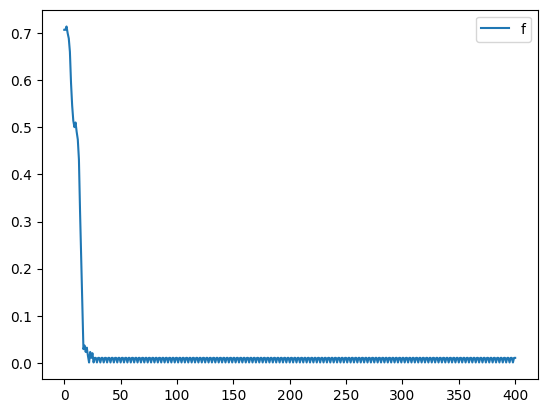

In [22]:
X.data.plot(y="f")